In [5]:
#Confirms main.py prints s1/s5 lines
MAIN = "/content/content/synth/main.py"   #change only if your path is different

with open(MAIN, "r", errors="ignore") as f:
    txt = f.read()
assert "s1:" in txt and "s5:" in txt, "Please apply the s1/s5 patch to main.py first."
print("Yes: main.py has s1/s5 in its progress print.")

Yes: main.py has s1/s5 in its progress print.


In [6]:
#paths
MAIN   = "/content/content/synth/main.py" #keep consistent
LOGDIR = "/content/run_logs_full" #full-run logs here

import os, pathlib, shlex, subprocess
pathlib.Path(LOGDIR).mkdir(parents=True, exist_ok=True)

def run_and_log(tag, **kw):
    """
    Runs main.py with given kwargs and writes stdout to LOGDIR/{tag}.log
    """
    cmd = ["python", MAIN]
    for k, v in kw.items():
        cmd += [f"--{k}", str(v)]
    print("RUN:", " ".join(shlex.quote(c) for c in cmd))
    out = subprocess.run(cmd, text=True, capture_output=True)
    print(out.stdout)
    open(f"{LOGDIR}/{tag}.log", "w").write(out.stdout)
    if out.stderr.strip():
        print("STDERR:\n", out.stderr)

In [7]:
#Learning rates LR-finder and tests
LR_GD   = "1e-3"
LR_ADAM = "1e-3"

#Long iteration counts
LONG_ITERS_GD   = 800_000
LONG_ITERS_ADAM = 30_000

#Shared synthetic configuration
BASE_SYN = dict(
    method="DLNN",
    data="gaussian", #noiseless synthetic
    N=100, #problem size
    rank=5,
    reg_norm="ratio",
    initscale="1e-3",
    sample_size=4000,
    log_interval=2000 #fewer log lines -> smaller files
)

In [8]:
for depth in (2, 5):
    # GD (solid in plots)
    run_and_log(f"F1_gd_d{depth}_lam0",
        **BASE_SYN, depth=depth, lam="0.0", optim="GD",   lr=LR_GD,   niters=LONG_ITERS_GD)

    # Adam (dashed in plots)
    run_and_log(f"F1_adam_d{depth}_lam0",
        **BASE_SYN, depth=depth, lam="0.0", optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM)


RUN: python /content/content/synth/main.py --method DLNN --data gaussian --N 100 --rank 5 --reg_norm ratio --initscale 1e-3 --sample_size 4000 --log_interval 2000 --depth 2 --lam 0.0 --optim GD --lr 1e-3 --niters 800000
depth: 2, iteration: 0, test_RMSE: 1.1268175840377808, erank: 66.96900177001953, s1: 0.002483401680365205, s5: 0.0021783490665256977
depth: 2, iteration: 2000, test_RMSE: 1.1268175840377808, erank: 66.9741439819336, s1: 0.0024833730421960354, s5: 0.0021786484867334366
depth: 2, iteration: 4000, test_RMSE: 1.1268175840377808, erank: 66.97360229492188, s1: 0.002484648721292615, s5: 0.0021800678223371506
depth: 2, iteration: 6000, test_RMSE: 1.1268175840377808, erank: 66.9673080444336, s1: 0.0024872703943401575, s5: 0.0021835591178387403
depth: 2, iteration: 8000, test_RMSE: 1.1268175840377808, erank: 66.95498657226562, s1: 0.0024911893997341394, s5: 0.0021900746505707502
depth: 2, iteration: 10000, test_RMSE: 1.1268175840377808, erank: 66.93666076660156, s1: 0.00249651377

In [9]:
for opt, lr, steps in (("Adam", LR_ADAM, LONG_ITERS_ADAM), ("GD", LR_GD, LONG_ITERS_GD)):
    run_and_log(f"F2_{opt.lower()}_d3_lam1e-4",
        **BASE_SYN, depth=3, lam="1e-4", optim=opt, lr=lr, niters=steps)


RUN: python /content/content/synth/main.py --method DLNN --data gaussian --N 100 --rank 5 --reg_norm ratio --initscale 1e-3 --sample_size 4000 --log_interval 2000 --depth 3 --lam 1e-4 --optim Adam --lr 1e-3 --niters 30000
depth: 3, iteration: 0, test_RMSE: 1.130967140197754, erank: 57.434810638427734, s1: 0.002728724619373679, s5: 0.002215920016169548
depth: 3, iteration: 2000, test_RMSE: 1.3698301315307617, erank: 5.165743827819824, s1: 52.67234802246094, s5: 35.7275390625
depth: 3, iteration: 4000, test_RMSE: 1.3699700832366943, erank: 5.0879106521606445, s1: 52.66286087036133, s5: 35.75092315673828
depth: 3, iteration: 6000, test_RMSE: 1.3700666427612305, erank: 5.024189472198486, s1: 52.658409118652344, s5: 35.766456604003906
depth: 3, iteration: 8000, test_RMSE: 1.3698979616165161, erank: 4.975847244262695, s1: 52.60279083251953, s5: 35.78527069091797
depth: 3, iteration: 10000, test_RMSE: 1.3700504302978516, erank: 4.961478233337402, s1: 52.660823822021484, s5: 35.787109375
depth

In [10]:
for lam in ("0.0", "1e-2"):
    run_and_log(f"F3_gd_d1_lam{lam}",
        **BASE_SYN, depth=1, lam=lam, optim="GD",   lr=LR_GD,   niters=LONG_ITERS_GD)
    run_and_log(f"F3_adam_d1_lam{lam}",
        **BASE_SYN, depth=1, lam=lam, optim="Adam", lr=LR_ADAM, niters=LONG_ITERS_ADAM)

RUN: python /content/content/synth/main.py --method DLNN --data gaussian --N 100 --rank 5 --reg_norm ratio --initscale 1e-3 --sample_size 4000 --log_interval 2000 --depth 1 --lam 0.0 --optim GD --lr 1e-3 --niters 800000
depth: 1, iteration: 0, test_RMSE: 1.129388451576233, erank: 80.63429260253906, s1: 0.0019347229972481728, s5: 0.0017415006877854466
depth: 1, iteration: 2000, test_RMSE: 1.129388451576233, erank: 66.09577941894531, s1: 0.025106655433773994, s5: 0.016447316855192184
depth: 1, iteration: 4000, test_RMSE: 1.129388451576233, erank: 65.4861068725586, s1: 0.05022093281149864, s5: 0.032651178538799286
depth: 1, iteration: 6000, test_RMSE: 1.129388451576233, erank: 65.38626861572266, s1: 0.07532285898923874, s5: 0.04885831102728844
depth: 1, iteration: 8000, test_RMSE: 1.129388451576233, erank: 65.36531829833984, s1: 0.1004033088684082, s5: 0.06505382806062698
depth: 1, iteration: 10000, test_RMSE: 1.129388451576233, erank: 65.3625717163086, s1: 0.12545941770076752, s5: 0.0812

In [11]:
#Fetch ML-100k (safe no-op if present)
import os, urllib.request, zipfile, io, pathlib
ML_DIR = "/content/ml-100k"
if not os.path.exists(f"{ML_DIR}/u.data"):
    print("Downloading MovieLens 100k …")
    data = urllib.request.urlopen("https://files.grouplens.org/datasets/movielens/ml-100k.zip").read()
    zipfile.ZipFile(io.BytesIO(data)).extractall("/content")
    assert os.path.exists(f"{ML_DIR}/u.data"), "MovieLens 100k not found after download."
print("✔ MovieLens ready.")

BASE_ML = dict(
    method="DLNN",
    data="ml-100k-sample",
    depth=1,
    optim="Adam",
    lr="5e-4", #working LR
    trainprop="0.8",
    reg_norm="ratio",
    initscale="1e-3",
    log_interval=1000
)

#λ = 0 vs 1e-3
run_and_log("ML_lam0_adam_long",    **BASE_ML, lam="0.0",  niters=40_000)
run_and_log("ML_lam1e-3_adam_long", **BASE_ML, lam="1e-3", niters=40_000)

✔ MovieLens ready.
RUN: python /content/content/synth/main.py --method DLNN --data ml-100k-sample --depth 1 --optim Adam --lr 5e-4 --trainprop 0.8 --reg_norm ratio --initscale 1e-3 --log_interval 1000 --lam 0.0 --niters 40000
depth: 1, iteration: 0, test_RMSE: 3.7128684520721436, erank: 675.819091796875, s1: 0.06876151263713837, s5: 0.016600891947746277
depth: 1, iteration: 1000, test_RMSE: 3.7128684520721436, erank: 624.34716796875, s1: 66.41107940673828, s5: 15.898189544677734
depth: 1, iteration: 2000, test_RMSE: 3.7128684520721436, erank: 623.4058837890625, s1: 128.39491271972656, s5: 30.638225555419922
depth: 1, iteration: 3000, test_RMSE: 3.7128684520721436, erank: 622.2479248046875, s1: 186.6156463623047, s5: 44.45459747314453
depth: 1, iteration: 4000, test_RMSE: 3.7128684520721436, erank: 620.95654296875, s1: 241.38926696777344, s5: 57.60871505737305
depth: 1, iteration: 5000, test_RMSE: 3.7128684520721436, erank: 619.6657104492188, s1: 292.7303466796875, s5: 70.26631927490234

In [12]:
import os, re, glob, pandas as pd, numpy as np

LOG_GLOBS = [os.path.join(LOGDIR, "*.log")]
files = sorted({p for g in LOG_GLOBS for p in glob.glob(g)})

pat = re.compile(
    r"depth:\s*(\d+).*?iteration:\s*(\d+).*?"
    r"test_RMSE:\s*([\-0-9\.Ee\+]+).*?erank:\s*([\-0-9\.Ee\+]+).*?"
    r"s1:\s*([\-0-9\.Ee\+]+).*?s5:\s*([\-0-9\.Ee\+]+)"
)

def infer_opt(name):
    n = name.lower()
    if "adam" in n: return "adam"
    if "gd"   in n: return "gd"
    return "unk"

rows = []
for path in files:
    with open(path, "r", errors="ignore") as f:
        for line in f:
            m = pat.search(line)
            if not m: continue
            d,it,rmse,er,s1,s5 = m.groups()
            rows.append(dict(
                file=os.path.basename(path),
                optimizer=infer_opt(path),
                depth=int(d),
                iteration=int(it),
                test_RMSE=float(rmse),
                erank=float(er),
                s1=float(s1),
                s5=float(s5),
            ))

df = pd.DataFrame(rows).sort_values(["optimizer","depth","iteration"]).reset_index(drop=True)
print(f"Parsed {len(df)} rows from {len(files)} log files.")
if df.empty:
    raise RuntimeError("No rows parsed – make sure runs completed and s1/s5 are printed.")
df.tail(10)

Parsed 2155 rows from 12 log files.


,file,optimizer,depth,iteration,test_RMSE,erank,s1,s5
2145,F1_gd_d5_lam0.log,gd,5,780000,1.119042,41.754005,0.004505,0.002799
2146,F1_gd_d5_lam0.log,gd,5,782000,1.119042,41.739948,0.004512,0.002801
2147,F1_gd_d5_lam0.log,gd,5,784000,1.119042,41.725899,0.004519,0.002802
2148,F1_gd_d5_lam0.log,gd,5,786000,1.119042,41.711735,0.004526,0.002804
2149,F1_gd_d5_lam0.log,gd,5,788000,1.119042,41.697536,0.004533,0.002805
2150,F1_gd_d5_lam0.log,gd,5,790000,1.119042,41.683300,0.004540,0.002807
2151,F1_gd_d5_lam0.log,gd,5,792000,1.119042,41.669014,0.004547,0.002808
2152,F1_gd_d5_lam0.log,gd,5,794000,1.119042,41.654690,0.004554,0.002810
2153,F1_gd_d5_lam0.log,gd,5,796000,1.119042,41.640285,0.004562,0.002812
2154,F1_gd_d5_lam0.log,gd,5,798000,1.119042,41.625851,0.004569,0.002813


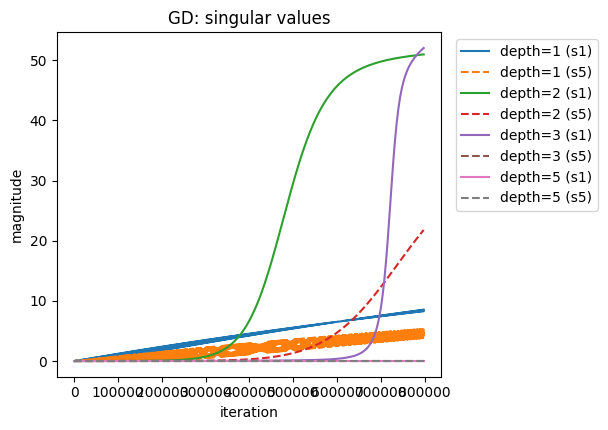

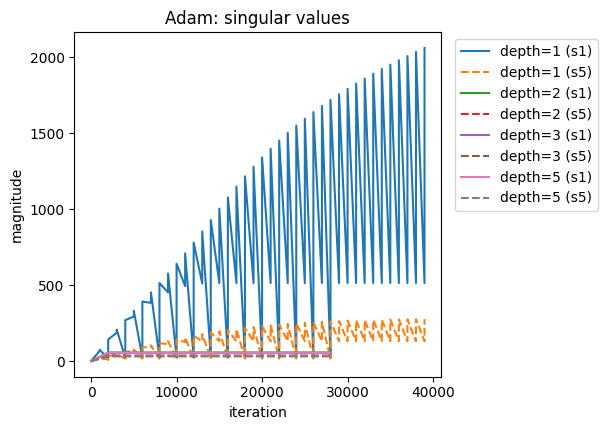

In [13]:
import matplotlib.pyplot as plt

def plot_sv_panel(opt_name, title):
    sub = df[df["optimizer"]==opt_name]
    if sub.empty: return
    plt.figure(figsize=(6.2,4.4))
    for d in sorted(sub["depth"].unique()):
        cur = sub[sub["depth"]==d]
        if cur.empty: continue
        plt.plot(cur["iteration"], cur["s1"], label=f"depth={d} (s1)")
        plt.plot(cur["iteration"], cur["s5"], linestyle="--", label=f"depth={d} (s5)")
    plt.title(title); plt.xlabel("iteration"); plt.ylabel("magnitude")
    plt.legend(bbox_to_anchor=(1.02,1), loc="upper left"); plt.tight_layout(); plt.show()

plot_sv_panel("gd",   "GD: singular values")
plot_sv_panel("adam", "Adam: singular values")

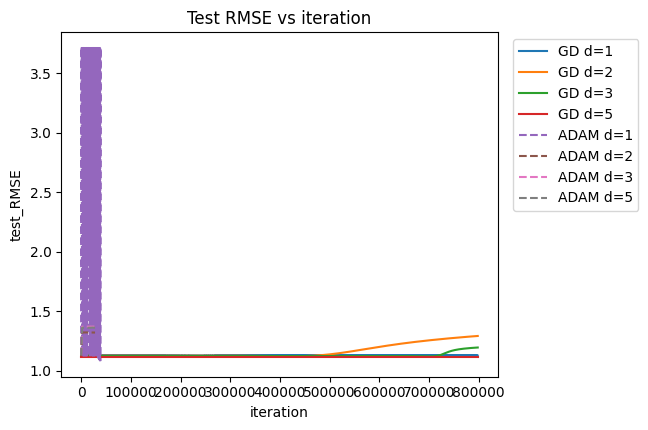

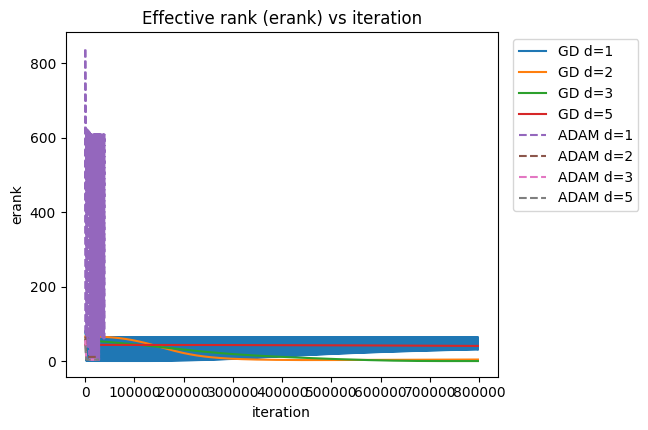

In [14]:
def plot_metric(metric, title):
    plt.figure(figsize=(6.6,4.4))
    for opt in ("gd","adam"):
        for d in sorted(df["depth"].unique()):
            cur = df[(df.optimizer==opt) & (df.depth==d)]
            if cur.empty: continue
            ls = "-" if opt=="gd" else "--"
            plt.plot(cur["iteration"], cur[metric], ls, label=f"{opt.upper()} d={d}")
    plt.xlabel("iteration"); plt.ylabel(metric); plt.title(title)
    plt.legend(bbox_to_anchor=(1.02,1), loc="upper left"); plt.tight_layout(); plt.show()

plot_metric("test_RMSE", "Test RMSE vs iteration")
plot_metric("erank",     "Effective rank (erank) vs iteration")

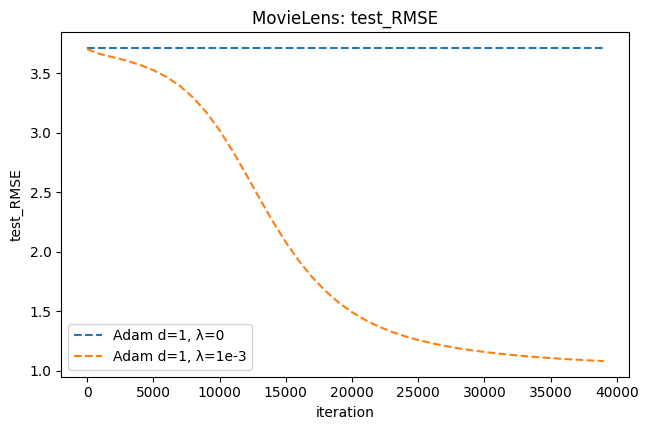

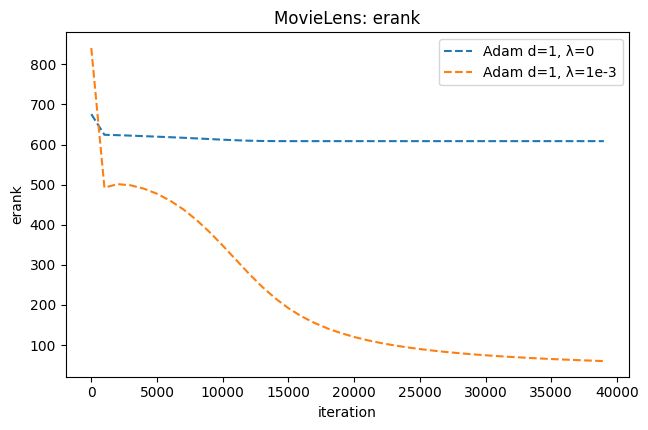

=== MovieLens last metrics ===
                    file  iteration  test_RMSE      erank          s1         s5
   ML_lam0_adam_long.log      39000   3.712868 608.515381  513.148743 130.616760
ML_lam1e-3_adam_long.log      39000   1.081064  60.196762 2059.987061 276.052612


In [15]:
ml = df[df["file"].str.contains("ML_", na=False)]
assert not ml.empty, "No MovieLens rows parsed. Run Cell 6 first."

#Extract λ from filename for labeling
def lab(name):
    return "λ=1e-3" if "lam1e-3" in name else "λ=0"

def plot_ml(metric, title):
    plt.figure(figsize=(6.6,4.4))
    for key, g in ml.groupby("file"):
        g = g.sort_values("iteration")
        plt.plot(g["iteration"], g[metric], "--", label=f"Adam d=1, {lab(key)}")
    plt.xlabel("iteration"); plt.ylabel(metric); plt.title(title)
    plt.legend(); plt.tight_layout(); plt.show()

plot_ml("test_RMSE", "MovieLens: test_RMSE")
plot_ml("erank",     "MovieLens: erank")

#summary table
last = (ml.sort_values(["file","iteration"])
          .groupby("file").tail(1)
          [["file","iteration","test_RMSE","erank","s1","s5"]])
print("=== MovieLens last metrics ===")
print(last.to_string(index=False))

In [16]:
last_syn = (df[~df["file"].str.contains("ML_", na=False)]
              .sort_values(["optimizer","depth","iteration"])
              .groupby(["optimizer","depth"]).tail(1)
              [["optimizer","depth","iteration","test_RMSE","erank","s1","s5"]])
print("=== Last metrics (synthetic, per optimizer & depth) ===")
print(last_syn.to_string(index=False))

=== Last metrics (synthetic, per optimizer & depth) ===
optimizer  depth  iteration  test_RMSE     erank        s1        s5
     adam      1      28000   1.378214  4.925950 58.694859 32.994831
     adam      2      28000   1.320843 12.232730 56.482361 31.388840
     adam      3      28000   1.370288  4.952991 52.757309 35.784588
     adam      5      28000   1.362176  4.940028 55.214802 33.268047
       gd      1     798000   1.124169 32.107864  8.543114  3.810782
       gd      2     798000   1.292061  5.181543 50.956833 21.791687
       gd      3     798000   1.195019  1.039811 52.019512  0.008127
       gd      5     798000   1.119042 41.625851  0.004569  0.002813
